In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from tqdm.notebook import trange

# Agenda

* Reference group meeting
* Summary of the course and the exercises
* Questions before the exam

# Summary of the course: What have we learnt?

## Philosophy of this course: The toolbox

The idea of this course is to give you a toolbox of tools that are useful in computational physics/science.
* You will not be an expert with all the tools,
* but you will have some ideas of the tools that exist
* and you will know where to start looking when you face a new problem.

Through the exercises, you will also:
* Try out different parts of the toolbox
* Gain experience with solving larger problems
* Think about how to test your code when you don't know the correct answer


### Suggestions for the exam: 

* Do not try to memorise all the methods we have looked at. You will have time to look up the details as you need them.
* Try to become as familiar as possible with your chosen language. If you have to look up syntax all the time, it may be difficult to complete the exam.
* Remember that you will get credit for what you have done. Start from the beginning, and try to complete the sub-problems as you go along. You can still get a good grade if you don't manage to complete the last sub-problem.

# Summary of Exercise 1

(Exercise 1 is almost exactly identical to the exam in 2016.)

Some key points:
* More of an algorithmic problem, than a specific numerical method.
* However, event-driven simulations are seen in many application.
* The code that you have written can be applied to a few different problems, with minor modification.
* The code can be expanded to take periodic boundary conditions into account.
* It is possible to split up the domain into smaller parts, and parallelise the code.
* Many of you have said that Exercise 1 was a lot of work.
* Some of you had problems with getting the simulations to run fast.

## Key to getting acceptable simulation times (in Python)

* Profiling (of my implementation, at least) indicates that the operation that takes the most time is to calculate the time to future particle-particle collisions.
* By using numpy array operations, we can avoid looping over all particles
* With the implementation below, I am able to run the simulations needed for the exercise within a reasonable time (certainly less than half an hour for everything)

In [2]:
def particle_particle_faster(i, X, V, R, N, time):
    # Calculate the time for particle i to collide with all other particles
    dx   = X - X[:,i][:,None]
    dv   = V - V[:,i][:,None]
    dvdx = np.sum(dv*dx, axis = 0)
    dv2  = np.sum(dv**2, axis = 0)
    dx2  = np.sum(dx**2, axis = 0)
    d    = dvdx**2 - dv2*(dx2 - (R+R[i])**2)
    # Only a small fraction of the elements will actually satisfy
    # d >= 0 and dvdx < 0, so calculate only for those
    inds = np.arange(len(d))[(d >= 0) & (dvdx < 0)]
    times = time - (dvdx[inds] + np.sqrt(d[inds])) / dv2[inds]
    colls = [Collision(times[n], i, j, N[i], N[j]) for n, j in enumerate(inds)]
    return colls

In [3]:
import sys
sys.path.append('.')

# I don't want to give away the entire solution just yet,
# so this is just imported here as an illustration of the runtime
from exercise1 import run_problem_1

Nspheres = 2000
NPC_max = 20*Nspheres
radius = 0.001

T, V = run_problem_1(Nspheres, NPC_max, radius)

 == Output ==            
Time:                     0.07857660228564795
Particle collisions:      40000
Wall collisions:          9010
Total collisions:         49010
Tc collisions:            0


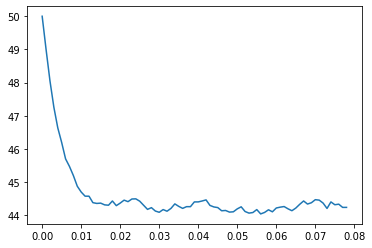

In [4]:
plt.plot(T, np.mean(np.sqrt(np.sum(V**2, axis = 1)), axis = 1))

# Summary of exercise 2:

(to be given by Verena)

* 


# Summary of Exercise 3:

Some key points:
* Parts of the code could be re-used from the notebook on PDEs
* Some focus on testing and thinking about numerical accuracy
* Most of the work (?) related to testing and convergence plots
* Demonstrate that simple models can sometimes give useful information
 * You cannot get accurate answers from a 1D model
 * but you can get order-of-magnitude estimates
 * and try to look at what effects are the ones that have most influence on the outcome
* Not so many questions yet, but they are starting to appear (on piazza)
* Many questions related to convergence plots
 * Convergence analysis can be a sensitive test

# Questions and answers

### Can we use parts of code from the notebooks/internet directly or is that plagiarism?

You can use small pieces of code (like an ODE solver, for example) from the internet or from the notebooks. You will of course still have to do the work of adapting it to your overall code. If you do use pieces of code like this, make sure to say that you have done so, and where the code came from. And it should be from a public source that I can find, not something you got on email from a friend.

This is similar to what you would do if you quoted a piece of text in your report: You would mark it clearly as a quote, and you would state the source. It's only plagiarism if you try to pass it off as your own work.


### Should we expect to have to lapack/blas libraries? (might require some prep work for non-python/numpy environments)

No, I would say high-performance linear algebra is not going to be an essential or time-consuming part of the exam.


### In case of collaboration with others, should we state that we have collaborated with someone? could you please give an example of what is ok in collaboration and what is regarded as plagiarism?

The exam is supposed to be anonymous, so you should not write your name, or the name of any other students, on the report.

It is perfectly ok to discuss algorithms and implementation details, and to see how other people have chosen to implement something, but it is not ok to copy code from other students. Write your own implementation.


### In terms of being anonymous, is it okay to upload the code for the exercises and the exam to GitHub in addition to appending them to the submission?

I suggest waiting until after the exam to make your code publicly available. Should you wish to refer to your own github page, then I might be able to identify you, but that is not a problem for me.


### Regarding exercise 2: Should videos be handed in?

The videos were mostly intended as a pedagogical tool for you, and as an exercise in 3D animation, which can be very useful for presentations and so on. It is not essential that you hand in the animations.

Should you wish to hand in animations, then you may put them in a zip-file or similar along with your code attachments, and you can refer to them in the report, for example by saying something "see the file animation.gif in the attached zip-file".


### About referencing, how to refer to the exam problem, the notebooks, or other sources?

The most important point about referencing is that the reader can easily understand what document you refer to. For refering to the exam problem or project description, it is enough to say something like "see Eq. (2) in the problem set", and it will be obvious in the context what you mean. For referring to the notebooks or lecture notes (slides), you can put them in the list of references, and refer by name, or by URL, or something like that. As long as I can easily understand which document it is, it is fine. I am not terribly fussed about correct formatting of references. For referring to any other documents, just use bibtex or word or whatever in the way you normally use it.


### So we can discuss the exam/solutions on piazza during the exam?

Yes, you can.


### How do we contact the instructors during the exam?

In addition to discussing with other students, you can also ask the instructors for help during the exam.

I suggest starting by asking questions on piazza. Please do not ask private questions in piazza, if you want to ask privately, it is better to send an email. The strength of piazza lies in the public discussion that others can benefit from.

You can also send email if you prefer. You can email all three of us (Tor, Verena and Guillermo), our email addresses are listed on Blackboard, and we can set up zoom calls if needed.

# Final remarks

The exam will have five or six sub-problems. They start easy, and become more difficult as you go on. Try to wrap up the early sub-problems as you go along, and make sure to describe what you have done. Make it easy for the person marking the exam to see which parts you have completed.

If you are unable to complete the last one or two sub-problems, you can still get a good result, but that requires that I can understand what you have done. If you have a code that nearly works, but no report, then it's hard for me to understand what you have done.